Predicting whether an employee is likely to leave a company (1) or stay (0).
HR Analytics: Job Change of Data Scientists

**Import Data and Python Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("C:\\aug_train.csv.zip")

In [3]:
test_df = pd.read_csv("C:\\aug_test.csv")

**Analyze Data**

In [4]:
train_df.info

<bound method DataFrame.info of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2

In [5]:
train_df.describe

<bound method NDFrame.describe of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   

In [6]:
test_df.info

<bound method DataFrame.info of       enrollee_id      city  city_development_index  gender  \
0           32403   city_41                   0.827    Male   
1            9858  city_103                   0.920  Female   
2           31806   city_21                   0.624    Male   
3           27385   city_13                   0.827    Male   
4           27724  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
2124         1289  city_103                   0.920    Male   
2125          195  city_136                   0.897    Male   
2126        31762  city_100                   0.887    Male   
2127         7873  city_102                   0.804    Male   
2128        12215  city_102                   0.804    Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience    Full time course        Graduate   
1     Has relevent experience       no_enrollment        Graduate   
2   

In [7]:
test_df.describe

<bound method NDFrame.describe of       enrollee_id      city  city_development_index  gender  \
0           32403   city_41                   0.827    Male   
1            9858  city_103                   0.920  Female   
2           31806   city_21                   0.624    Male   
3           27385   city_13                   0.827    Male   
4           27724  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
2124         1289  city_103                   0.920    Male   
2125          195  city_136                   0.897    Male   
2126        31762  city_100                   0.887    Male   
2127         7873  city_102                   0.804    Male   
2128        12215  city_102                   0.804    Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience    Full time course        Graduate   
1     Has relevent experience       no_enrollment        Graduate   
2 

In [8]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
train_df.shape

(19158, 14)

In [10]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 19158.


In [11]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [12]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 2129.


**'target' variable is missing from test data. So goal is to predict this target variable.**

**Missing Value**


In [13]:
train_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Missing value percentage per column

In [14]:
print("Percent of missing 'gender' records is %.2f%%"%((train_df['gender'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'enrolled_university' records is %.2f%%"%((train_df['enrolled_university'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'education_level' records is %.2f%%"%((train_df['education_level'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'major_discipline' records is %.2f%%"%((train_df['major_discipline'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'experience' records is %.2f%%"%((train_df['experience'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'company_size' records is %.2f%%"%((train_df['company_size'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'company_type' records is %.2f%%"%((train_df['company_type'].isnull().sum()/train_df.shape[0])*100))
print("Percent of missing 'last_new_job' records is %.2f%%"%((train_df['last_new_job'].isnull().sum()/train_df.shape[0])*100))

Percent of missing 'gender' records is 23.53%
Percent of missing 'enrolled_university' records is 2.01%
Percent of missing 'education_level' records is 2.40%
Percent of missing 'major_discipline' records is 14.68%
Percent of missing 'experience' records is 0.34%
Percent of missing 'company_size' records is 30.99%
Percent of missing 'company_type' records is 32.05%
Percent of missing 'last_new_job' records is 2.21%


In [15]:
cat_col = []
num_col = []
for col in train_df:
    if train_df[col].dtype == object:
        print('categorical column : ',col)
        cat_col.append(col)

    else:
        print("numerical column : ",col)
        num_col.append(col)

numerical column :  enrollee_id
categorical column :  city
numerical column :  city_development_index
categorical column :  gender
categorical column :  relevent_experience
categorical column :  enrolled_university
categorical column :  education_level
categorical column :  major_discipline
categorical column :  experience
categorical column :  company_size
categorical column :  company_type
categorical column :  last_new_job
numerical column :  training_hours
numerical column :  target


In [16]:
cat_col       #categorical columns in dataset

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [17]:
num_col     #numerical columns in dataset

['enrollee_id', 'city_development_index', 'training_hours', 'target']

<AxesSubplot:ylabel='gender'>

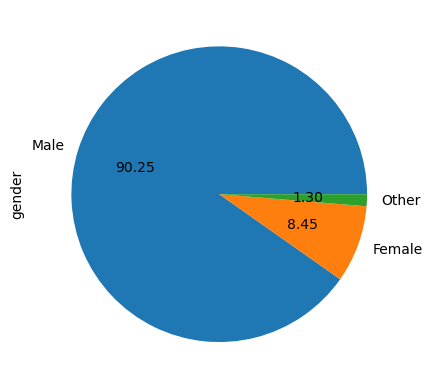

In [18]:
train_df['gender'].value_counts().plot(kind = 'pie',autopct ='%.2f')

This shows that most of peoples in our data is male approximately 90.25% of total data.

<AxesSubplot:ylabel='enrolled_university'>

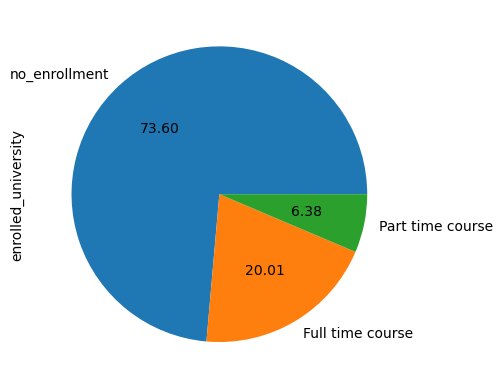

In [19]:
train_df['enrolled_university'].value_counts().plot(kind = 'pie',autopct ='%.2f')

<AxesSubplot:ylabel='education_level'>

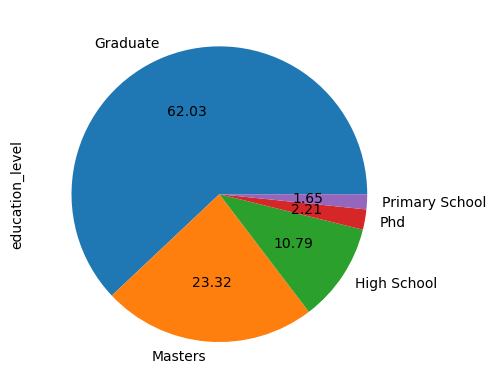

In [20]:
train_df['education_level'].value_counts().plot(kind = 'pie',autopct ='%.2f')

<AxesSubplot:ylabel='major_discipline'>

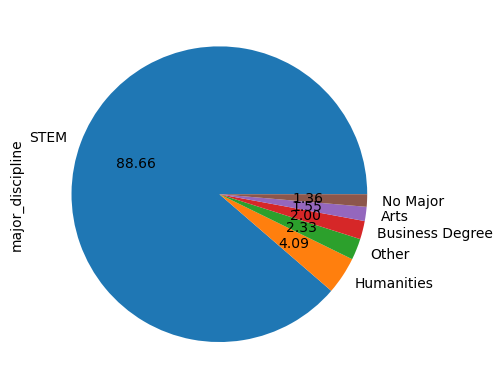

In [21]:
train_df['major_discipline'].value_counts().plot(kind = 'pie',autopct ='%.2f')

<AxesSubplot:ylabel='experience'>

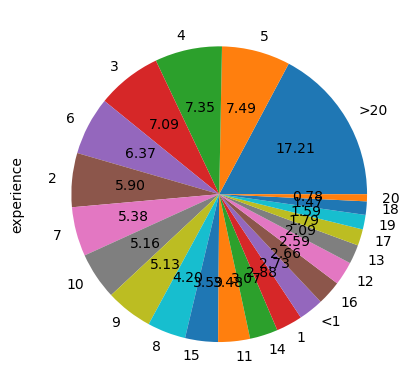

In [22]:
train_df['experience'].value_counts().plot(kind = 'pie',autopct ='%.2f')

<AxesSubplot:ylabel='company_size'>

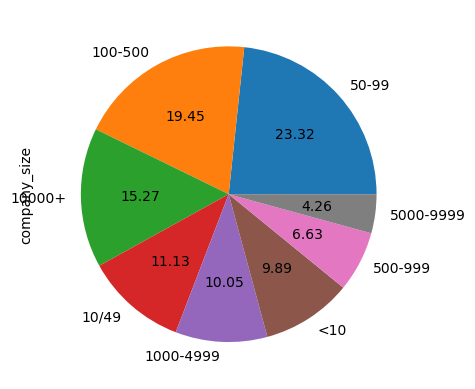

In [23]:
train_df['company_size'].value_counts().plot(kind = 'pie',autopct ='%.2f')

<AxesSubplot:ylabel='company_type'>

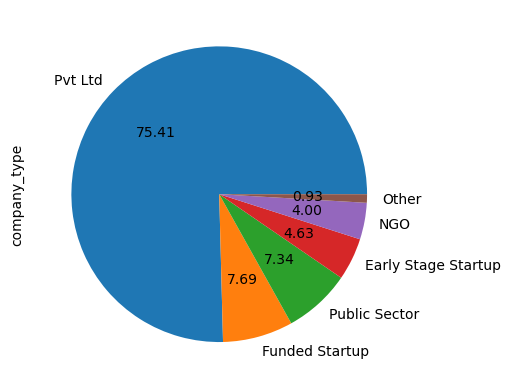

In [24]:
train_df['company_type'].value_counts().plot(kind = 'pie',autopct ='%.2f')

<AxesSubplot:ylabel='last_new_job'>

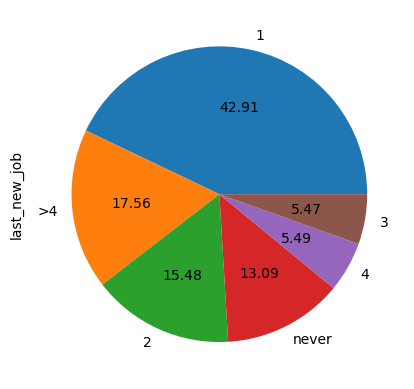

In [25]:
train_df['last_new_job'].value_counts().plot(kind = 'pie',autopct ='%.2f')

From the above information it is clear to handle the missing values we can use dropna() method.

We have very imbalanced data for every column ,so using mode for imputation is not correct.

**Exploratory Data Analysis**

<AxesSubplot:>

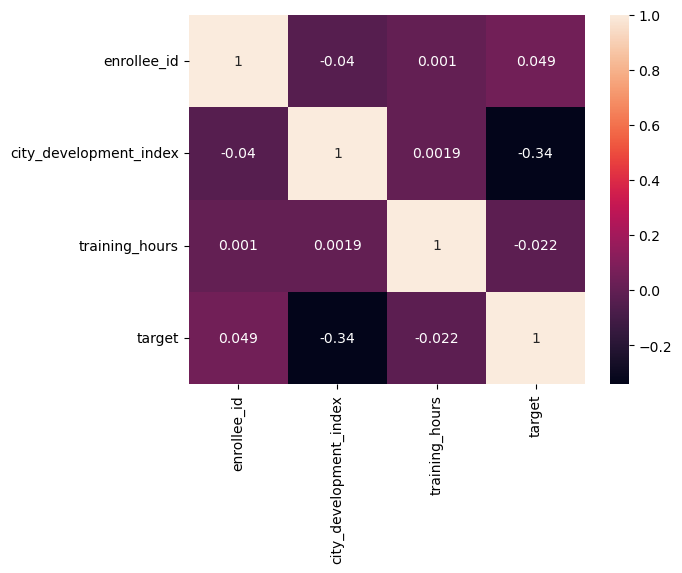

In [26]:
sns.heatmap(train_df.corr(), annot=True)

In [27]:
train_df.corr()['target']

enrollee_id               0.049475
city_development_index   -0.341665
training_hours           -0.021577
target                    1.000000
Name: target, dtype: float64

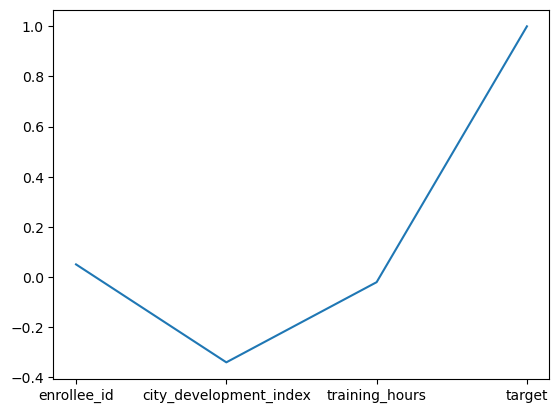

In [28]:
plt.plot(train_df.corr()['target'])

This gives us that city_development_index has strong negative correlation with target column.


That means the more developed the city less chance of employee leaving the job.

**Exploration of city_development_index**

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

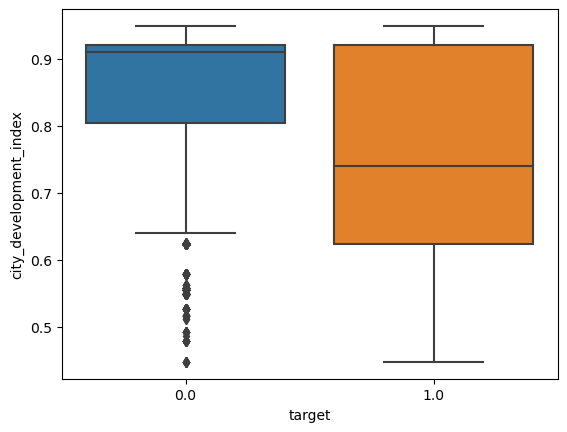

In [29]:
sns.boxplot(x='target' , y ='city_development_index' , data = train_df)

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

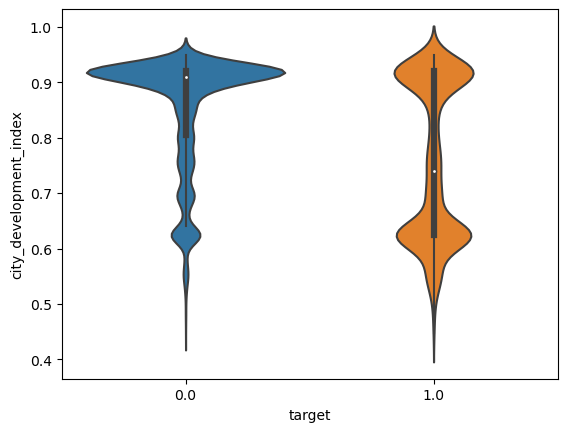

In [30]:
sns.violinplot(x='target', y='city_development_index', data = train_df)

This shows that companies in more developed region have lower leftover rate.

**Exploration of training_hour**

<AxesSubplot:xlabel='target', ylabel='training_hours'>

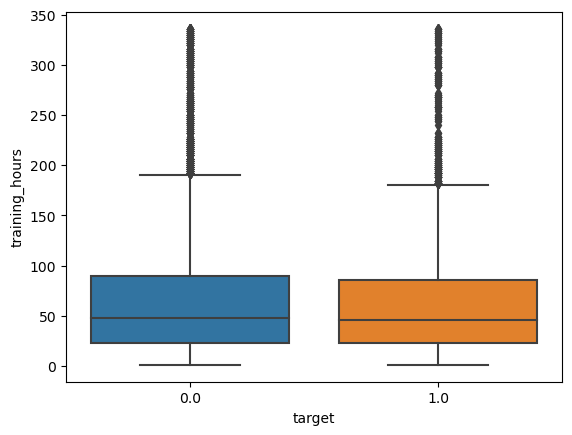

In [31]:
sns.boxplot(x='target', y='training_hours', data = train_df)

<AxesSubplot:xlabel='target', ylabel='training_hours'>

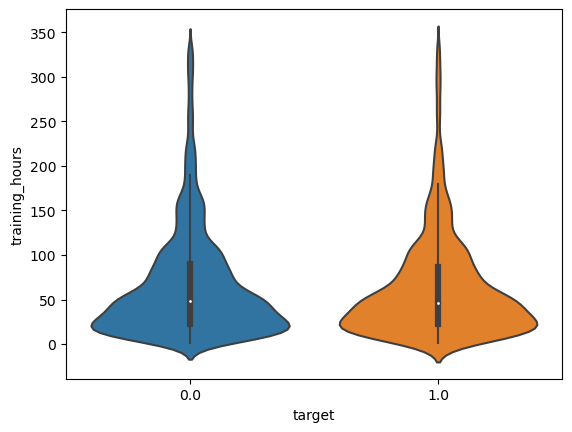

In [32]:
sns.violinplot(x='target', y='training_hours', data = train_df)

It shows that "training_hours" did not show a significant correlation with the turnover rate.

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

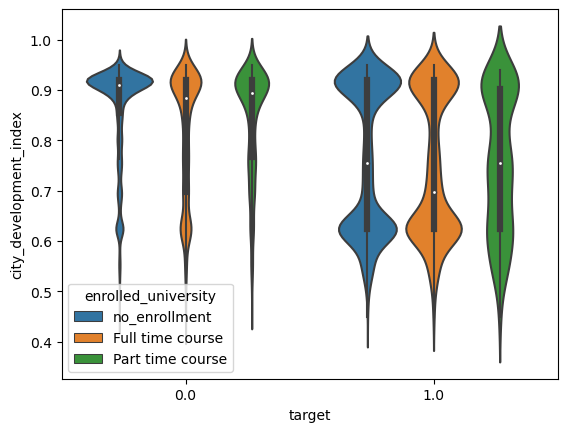

In [33]:
sns.violinplot(x='target',y='city_development_index',data = train_df,hue = 'enrolled_university')

<AxesSubplot:xlabel='enrolled_university', ylabel='city_development_index'>

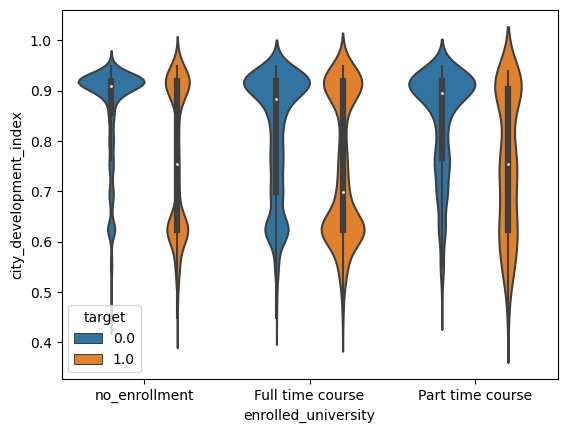

In [34]:
sns.violinplot(x='enrolled_university',y='city_development_index',data = train_df,hue = 'target')

**Exploration of enrolled_university**

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

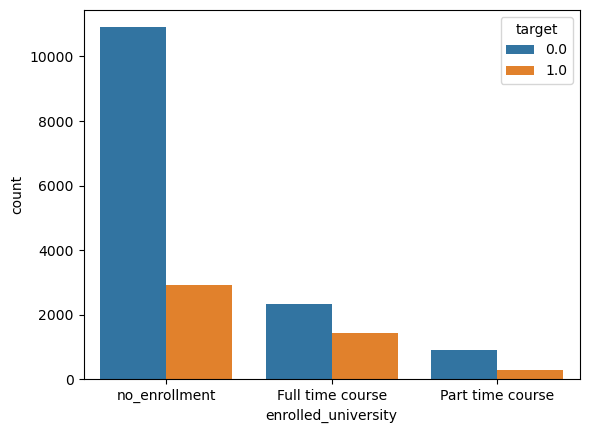

In [35]:
sns.countplot(x='enrolled_university',data=train_df,hue='target')

It is clear from the above graph that the turnover rate for no university enrollment is relatively low.
lets see the numbers

<AxesSubplot:xlabel='target', ylabel='count'>

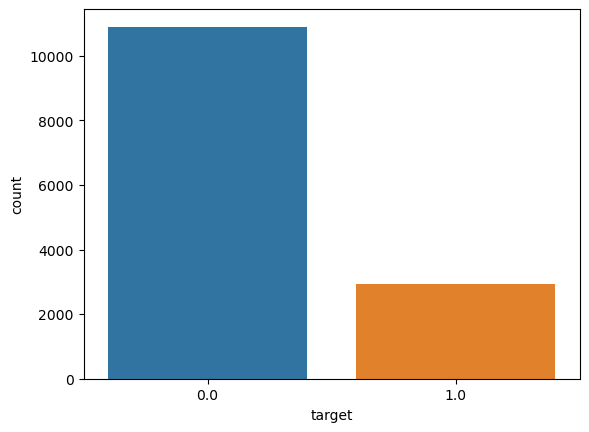

In [36]:
sns.countplot(x='target',data=train_df[train_df['enrolled_university']=='no_enrollment'])

This shows that more than 10000 of peoples are more likely to not leave the job where people is not enrolled in university.

In [37]:
train_df[train_df['enrolled_university']=='no_enrollment'].describe()

,enrollee_id,city_development_index,training_hours,target
count,13817.000000,13817.000000,13817.000000,13817.000000
mean,16644.602229,0.842107,65.362018,0.211406
std,9674.592803,0.117346,59.617408,0.408321
min,1.000000,0.448000,1.000000,0.000000
25%,8230.000000,0.776000,23.000000,0.000000
50%,16662.000000,0.910000,48.000000,0.000000
75%,25049.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [38]:
train_df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [39]:
train_df[train_df['enrolled_university'] == 'no_enrollment'].describe()['target']['mean']

0.21140623869146705

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

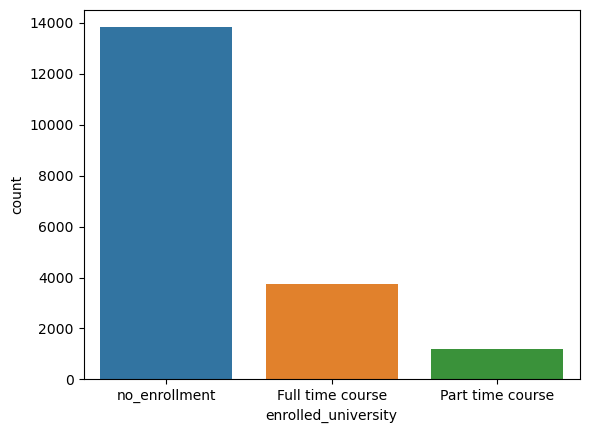

In [40]:
sns.countplot(x='enrolled_university',data=train_df)

no university enrollment have the lowest turnover rate, followed by Full time then Part time.

**Exploration of gender**

<AxesSubplot:xlabel='gender', ylabel='count'>

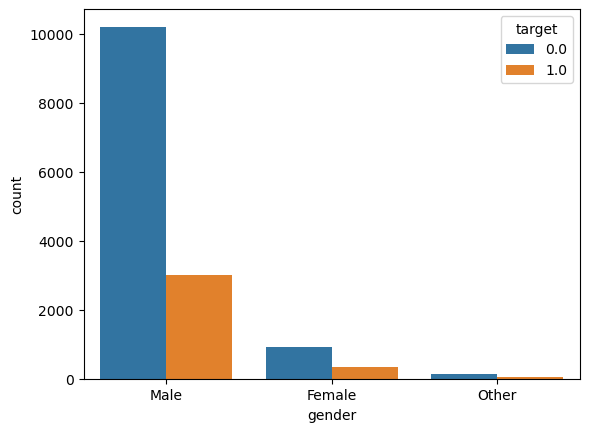

In [41]:
sns.countplot(x='gender', data=train_df, hue='target')

This shows the imbalance due to proportion of men is too large.

**Exploration of relevant_experience**

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

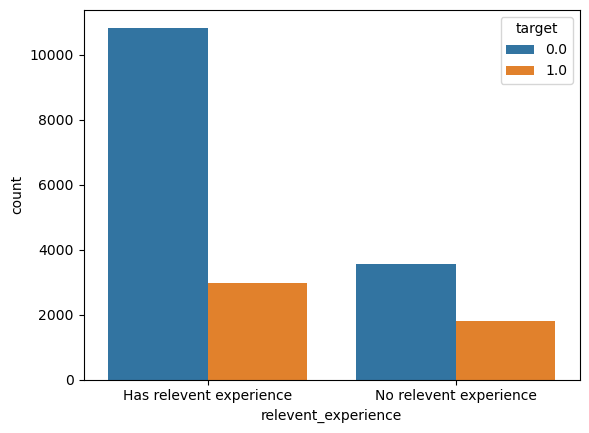

In [42]:
sns.countplot(x='relevent_experience', data=train_df, hue='target')

If the person has relevant experience in this job, the turnover rate is low.
The higher the experience, the lower the turnover rate.

**Exploration of education_level**

<AxesSubplot:xlabel='education_level', ylabel='count'>

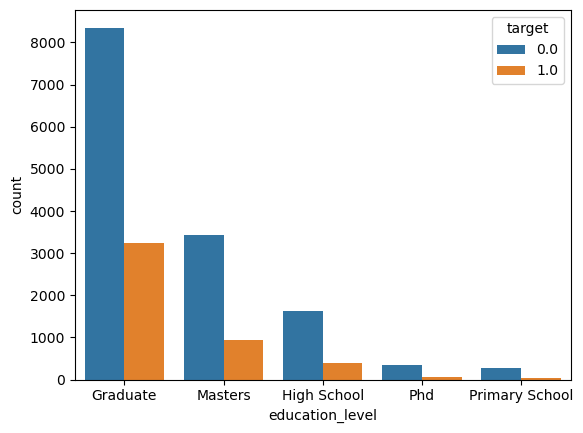

In [43]:
sns.countplot(x='education_level', data = train_df ,hue = 'target')

In [44]:
levels = list(train_df['education_level'].unique())

In [45]:
for level in levels:
  print(level," --->", train_df[train_df['education_level'] == level]['target'].mean())

Graduate  ---> 0.2797896188998103
Masters  ---> 0.21440036688832836
High School  ---> 0.19533961328705998
nan  ---> nan
Phd  ---> 0.14009661835748793
Primary School  ---> 0.1331168831168831


General  graduates have a higher turnover rate than those with very low or very high levels of education.

It is also clear from graph that the number of peoples with graduation is too high in data relative to others.

**Exploration of major_discipline**

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

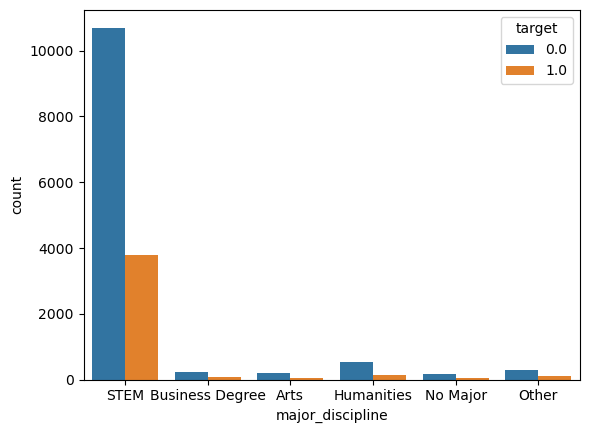

In [46]:
sns.countplot(x='major_discipline', data=train_df, hue='target')

In [47]:
majors = list(train_df['major_discipline'].unique())
majors

['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major', 'Other']

In [48]:
for major in majors:
  print(major,' --->' ,train_df[train_df['major_discipline'] == major]['target'].mean())


STEM  ---> 0.2615926028153464
Business Degree  ---> 0.26299694189602446
nan  ---> nan
Arts  ---> 0.20948616600790515
Humanities  ---> 0.21076233183856502
No Major  ---> 0.24663677130044842
Other  ---> 0.2677165354330709


This shows no significant difference in turnover rate based on the major.

In [49]:
cat_col

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

**Exploration of company_size**

<AxesSubplot:xlabel='company_size', ylabel='count'>

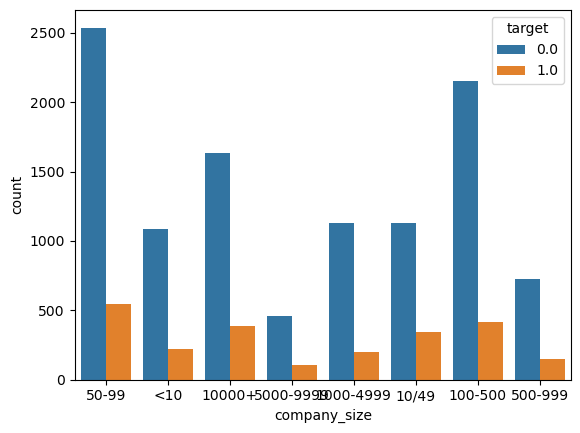

In [50]:
sns.countplot(x='company_size',data = train_df,hue= 'target')

In [51]:
sizes = list(train_df['company_size'].unique())
sizes

[nan,
 '50-99',
 '<10',
 '10000+',
 '5000-9999',
 '1000-4999',
 '10/49',
 '100-500',
 '500-999']

In [52]:
for size in sizes:
  print(size,'-->',train_df[train_df['company_size'] == size]['target'].mean())

nan --> nan
50-99 --> 0.1767758676613688
<10 --> 0.1712538226299694
10000+ --> 0.1906884596334819
5000-9999 --> 0.1811722912966252
1000-4999 --> 0.15060240963855423
10/49 --> 0.23385452073419444
100-500 --> 0.161415791520809
500-999 --> 0.1733181299885975


The size of company also did not affect the turnover rate much.

**Exploration of company_type**

<AxesSubplot:xlabel='company_type', ylabel='count'>

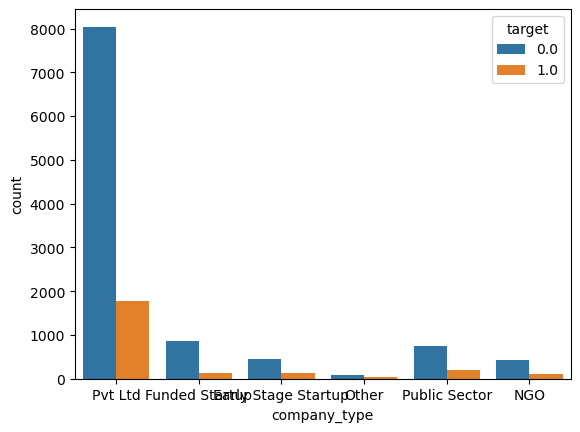

In [53]:
sns.countplot(x='company_type',data = train_df,hue= 'target')

In [54]:
types = list(train_df['company_type'].unique())
types

[nan,
 'Pvt Ltd',
 'Funded Startup',
 'Early Stage Startup',
 'Other',
 'Public Sector',
 'NGO']

In [55]:
for type in types:
  print(type,'-->',train_df[train_df['company_type']==type]['target'].mean())

nan --> nan
Pvt Ltd --> 0.18080880105938676
Funded Startup --> 0.13986013986013987
Early Stage Startup --> 0.23548922056384744
Other --> 0.2396694214876033
Public Sector --> 0.2198952879581152
NGO --> 0.18618042226487524


Highest turnover rate is for the early stage startup and lowest turnover is for funded startup.

**Exploration of last_new_job**

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

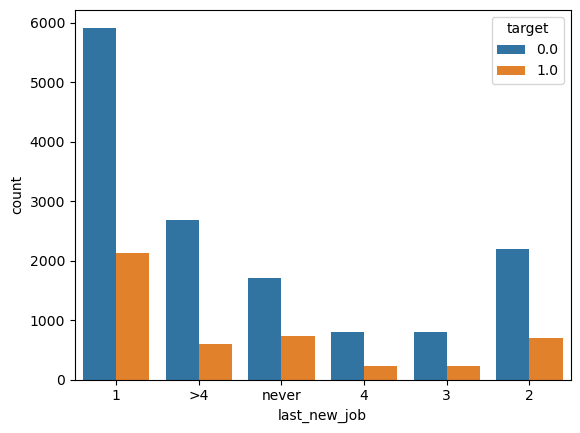

In [56]:
sns.countplot(x='last_new_job',data = train_df , hue = 'target')

In [57]:
years = list(train_df['last_new_job'].unique())
for year in years:
  print(year,'--->',train_df[train_df['last_new_job']==year]['target'].mean())

1 ---> 0.26430348258706465
>4 ---> 0.182370820668693
never ---> 0.30138662316476345
4 ---> 0.22157434402332363
3 ---> 0.2255859375
2 ---> 0.2413793103448276
nan ---> nan


If the number of years of previous employment is very high (4 years or more), the turnover rate is low, and if there is no work experience (if it is the first job), the turnover rate is high.

In [58]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


**Dropping null_values and Feature Encoding**

In [59]:
train_df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [60]:
train_data = train_df.dropna()


In [61]:
test_data = test_df.dropna()

In [62]:
train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [63]:
train_data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [64]:
train_data.describe()

,enrollee_id,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000,8955.000000
mean,16869.638749,0.844570,65.074930,0.165606
std,9963.804718,0.116178,60.235087,0.371747
min,2.000000,0.448000,1.000000,0.000000
25%,8150.000000,0.794000,23.000000,0.000000
50%,16924.000000,0.910000,47.000000,0.000000
75%,25902.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [65]:
train_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


In [66]:
test_data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
11,9272,city_90,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,2,51
12,14249,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,100-500,Other,never,48
16,7865,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,city_71,0.884,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,Public Sector,1,16
2115,13833,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,1,8
2117,21500,city_44,0.725,Male,No relevent experience,Part time course,Graduate,STEM,7,<10,Early Stage Startup,never,160
2121,27163,city_173,0.878,Male,No relevent experience,no_enrollment,Masters,STEM,16,<10,Pvt Ltd,>4,58


In [67]:
list(cat_col)

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [68]:
for col in cat_col:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[col])], axis=1)
    del(train_data[col])

In [69]:
train_data

,enrollee_id,city_development_index,training_hours,target,city_1,city_10,city_100,city_101,city_102,city_103,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,402,0.762,18,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
11,23853,0.920,108,0.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,0.624,52,1.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19149,251,0.920,36,1.0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
19150,32313,0.920,23,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
19152,29754,0.920,25,0.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [70]:
#One hot Encoding for feature encoding
for col in cat_col:
    test_data = pd.concat([test_data, pd.get_dummies(test_data[col])], axis=1)
    del(test_data[col])

In [71]:
test_data

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
3,27385,0.827,39,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,27724,0.920,72,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
11,9272,0.698,51,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
12,14249,0.762,48,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
16,7865,0.624,4,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,10726,0.884,16,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2115,13833,0.624,8,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2117,21500,0.725,160,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2121,27163,0.878,58,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [72]:
#deleting the extra columns present in train data but absent in test data.
del_col = []
for col in list(train_data.columns):
    if col not in list(test_data.columns):
        print(col)
        if col != 'target':
            del_col.append(col)


target
city_1
city_106
city_107
city_109
city_117
city_120
city_126
city_127
city_129
city_131
city_144
city_145
city_146
city_155
city_166
city_18
city_2
city_26
city_33
city_37
city_48
city_53
city_55
city_59
city_62
city_7
city_78
city_81


In [73]:
del_col

['city_1',
 'city_106',
 'city_107',
 'city_109',
 'city_117',
 'city_120',
 'city_126',
 'city_127',
 'city_129',
 'city_131',
 'city_144',
 'city_145',
 'city_146',
 'city_155',
 'city_166',
 'city_18',
 'city_2',
 'city_26',
 'city_33',
 'city_37',
 'city_48',
 'city_53',
 'city_55',
 'city_59',
 'city_62',
 'city_7',
 'city_78',
 'city_81']

In [74]:
for col in del_col:
  del(train_data[col])

In [75]:
train_data

,enrollee_id,city_development_index,training_hours,target,city_10,city_100,city_101,city_102,city_103,city_104,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,402,0.762,18,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,1.0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
11,23853,0.920,108,0.0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,0.624,52,1.0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19149,251,0.920,36,1.0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
19150,32313,0.920,23,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
19152,29754,0.920,25,0.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
train_data.isnull().sum()

enrollee_id               0
city_development_index    0
training_hours            0
target                    0
city_10                   0
                         ..
2                         0
3                         0
4                         0
>4                        0
never                     0
Length: 151, dtype: int64

In [77]:
train_data.isnull().sum().sum()

0

In [78]:
test_data.isnull().sum()

enrollee_id               0
city_development_index    0
training_hours            0
city_10                   0
city_100                  0
                         ..
2                         0
3                         0
4                         0
>4                        0
never                     0
Length: 150, dtype: int64

In [79]:
test_data.isnull().sum().sum()

0

This shows our data didn't connect any null values. All null values are dropped.

**Model**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
y = train_data['target']

In [82]:
X = train_data.drop('target',axis = 1)

In [83]:
X

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
1,29725,0.776,47,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,666,0.767,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,402,0.762,18,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,27107,0.920,46,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
11,23853,0.920,108,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21319,0.624,52,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19149,251,0.920,36,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
19150,32313,0.920,23,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
19152,29754,0.920,25,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [84]:
X_train , X_valid ,y_train, y_valid = train_test_split(X,y,shuffle=True, random_state = 1, test_size = 0.3 )

In [85]:
X_train

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
15590,7729,0.624,42,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18064,2845,0.804,45,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
18357,22109,0.624,68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9063,1394,0.895,22,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4653,19206,0.920,15,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6041,27528,0.920,8,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
16712,7549,0.920,14,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1916,3742,0.920,47,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
11019,154,0.754,31,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [86]:
X_valid

,enrollee_id,city_development_index,training_hours,city_10,city_100,city_101,city_102,city_103,city_104,city_105,...,NGO,Other,Public Sector,Pvt Ltd,1,2,3,4,>4,never
13337,28933,0.624,156,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
10598,5761,0.896,109,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
596,15259,0.920,46,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
19047,10182,0.920,60,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
15395,23100,0.920,2,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6194,54,0.754,34,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
8334,28256,0.924,28,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
8069,11375,0.920,50,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
76,22683,0.893,65,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [87]:
y_train

15590    0.0
18064    0.0
18357    1.0
9063     0.0
4653     0.0
        ... 
6041     0.0
16712    0.0
1916     0.0
11019    0.0
492      1.0
Name: target, Length: 6268, dtype: float64

In [88]:
y_valid

13337    0.0
10598    0.0
596      0.0
19047    0.0
15395    0.0
        ... 
6194     0.0
8334     0.0
8069     0.0
76       0.0
13039    1.0
Name: target, Length: 2687, dtype: float64

**Logistic Regrssion**

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [90]:
model.fit(X_train,y_train)

LogisticRegression()

In [91]:
LogisticRegression()

LogisticRegression()

In [92]:
predictions = model.predict(X_valid)

In [93]:
predictions

array([1., 0., 0., ..., 0., 0., 0.])

In [94]:
y_valid.shape

(2687,)

**Validation of Accuracy**

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(predictions,y_valid)

0.8548567175288426

**Model Evaluation Based on K-fold cross validation using cross_val_score() function**

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [98]:
logreg = LogisticRegression()

scores_accuracy = cross_val_score(logreg,X,y,cv=10,scoring='accuracy')
scores_log_loss = cross_val_score(logreg,X,y,cv=10,scoring='neg_log_loss')
scores_auc = cross_val_score(logreg,X,y,cv=10,scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

K-fold cross-validation results:
LogisticRegression average accuracy is 0.847
LogisticRegression average log_loss is 0.392
LogisticRegression average auc is 0.728


C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
scores_accuracy

array([0.86049107, 0.83482143, 0.83370536, 0.85714286, 0.86049107,
       0.85251397, 0.83463687, 0.83463687, 0.84357542, 0.85363128])

**Model evaluation based on K-fold cross-validation using cross_validate() function**

In [100]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy':'accuracy','log_loss':'neg_log_loss','auc':'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-fold cross-validation results:
LogisticRegression average accuracy: 0.847 (+/-0.011)
LogisticRegression average log_loss: 0.392 (+/-0.028)
LogisticRegression average auc: 0.728 (+/-0.047)


C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [101]:
results

{'fit_time': array([0.49829769, 0.25176144, 0.21805716, 0.31886101, 0.42394042,
        0.34508348, 0.21960592, 0.20033669, 0.30121613, 0.44860458]),
 'score_time': array([0.02300501, 0.        , 0.02713346, 0.01563025, 0.        ,
        0.01563239, 0.01251125, 0.01450968, 0.01562905, 0.02064157]),
 'test_accuracy': array([0.86049107, 0.83482143, 0.83370536, 0.85714286, 0.86049107,
        0.85251397, 0.83463687, 0.83463687, 0.84357542, 0.85363128]),
 'test_neg_log_loss': array([-0.37264719, -0.43453646, -0.424432  , -0.36944485, -0.36547268,
        -0.37316946, -0.41916535, -0.42269532, -0.3822909 , -0.35921478]),
 'test_roc_auc': array([0.73241256, 0.62775509, 0.68787005, 0.75678104, 0.77507345,
        0.75091356, 0.71053584, 0.6949962 , 0.74356887, 0.80127718])}

**GridSearchCV evaluating using multiple scorers simultaneously**

In [102]:
from sklearn.model_selection import GridSearchCV

grid = {"C":np.arange(1e-05, 3, 0.1),'penalty':['l2']}

logreg  = LogisticRegression()
logreg_cv  = GridSearchCV(logreg ,grid,cv=10)
logreg_cv.fit(X,y)

print("Tuned HpyerParameters :(Best Parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sakshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Tuned HpyerParameters :(Best Parameters)  {'C': 0.20001000000000002, 'penalty': 'l2'}
Accuracy : 0.8504706205107742


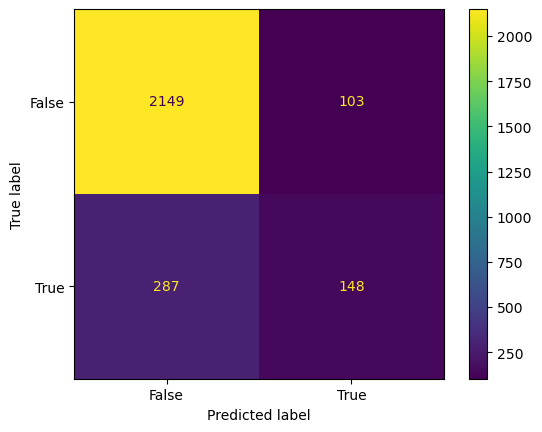

In [103]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_valid, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      2252
         1.0       0.59      0.34      0.43       435

    accuracy                           0.85      2687
   macro avg       0.74      0.65      0.67      2687
weighted avg       0.83      0.85      0.84      2687

